# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#Building Query URL
query_url = f"{base_url}appid={weather_api_key}&q="

In [15]:
city_wx = []
lat = []
lon = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

record_count = 1
set_count = 1

print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    if record_count >= 50:
        time.sleep(60)
        record_count = 0
        set_count += 1
    
    response = requests.get(query_url + city + '&units=imperial').json()
    record_count += 1
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_wx.append(city)
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
    except KeyError:
        print('City not found. Skipping...')
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | cidreira
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | kidal
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | zaraza
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | montbrison
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | korla
Processing Record 23 of Set 1 | duldurga
Processing Record 24 of Set 1 | klaksvik
Processing Record 25 of Set 1 | hami
Processing Record 2

Processing Record 9 of Set 5 | mende
Processing Record 10 of Set 5 | athabasca
Processing Record 11 of Set 5 | byron bay
Processing Record 12 of Set 5 | caninde
Processing Record 13 of Set 5 | ixtapa
Processing Record 14 of Set 5 | tuatapere
Processing Record 15 of Set 5 | syava
Processing Record 16 of Set 5 | roanoke rapids
Processing Record 17 of Set 5 | mount gambier
Processing Record 18 of Set 5 | sisimiut
Processing Record 19 of Set 5 | ust-nera
Processing Record 20 of Set 5 | hilo
Processing Record 21 of Set 5 | saint-francois
Processing Record 22 of Set 5 | kodiak
Processing Record 23 of Set 5 | clyde river
Processing Record 24 of Set 5 | sao joao da barra
Processing Record 25 of Set 5 | sitka
Processing Record 26 of Set 5 | ostrovnoy
Processing Record 27 of Set 5 | krasnoarmeysk
Processing Record 28 of Set 5 | alugan
Processing Record 29 of Set 5 | valparaiso
Processing Record 30 of Set 5 | norman wells
Processing Record 31 of Set 5 | kautokeino
Processing Record 32 of Set 5 | 

Processing Record 15 of Set 9 | gamba
Processing Record 16 of Set 9 | verkhnevilyuysk
Processing Record 17 of Set 9 | coquimbo
Processing Record 18 of Set 9 | sept-iles
Processing Record 19 of Set 9 | virginia beach
Processing Record 20 of Set 9 | hualmay
Processing Record 21 of Set 9 | emba
Processing Record 22 of Set 9 | chimoio
Processing Record 23 of Set 9 | merauke
Processing Record 24 of Set 9 | biltine
Processing Record 25 of Set 9 | cayenne
Processing Record 26 of Set 9 | mangrol
Processing Record 27 of Set 9 | gazojak
Processing Record 28 of Set 9 | akropong
City not found. Skipping...
Processing Record 30 of Set 9 | rapid valley
Processing Record 31 of Set 9 | zaysan
Processing Record 32 of Set 9 | sekoma
Processing Record 33 of Set 9 | ponta delgada
Processing Record 34 of Set 9 | rocky mountain house
Processing Record 35 of Set 9 | mandalgovi
Processing Record 36 of Set 9 | bullhead city
Processing Record 37 of Set 9 | regina
Processing Record 38 of Set 9 | sorland
Processi

Processing Record 16 of Set 13 | san andres
Processing Record 17 of Set 13 | bonavista
Processing Record 18 of Set 13 | sorong
Processing Record 19 of Set 13 | chernyshevskiy
Processing Record 20 of Set 13 | sovetskiy
Processing Record 21 of Set 13 | soyo
Processing Record 22 of Set 13 | tessalit
Processing Record 23 of Set 13 | mantua
Processing Record 24 of Set 13 | sur
Processing Record 25 of Set 13 | tera
Processing Record 26 of Set 13 | tahta
Processing Record 27 of Set 13 | nelson bay
Processing Record 28 of Set 13 | hofn
Processing Record 29 of Set 13 | bandarbeyla
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
city_wx_df = pd.DataFrame({
    'City':city_wx,
    'Lat':lat, 
    'Lng':lon,
    'Max Temp':maxTemp, 
    'Humidity':humidity, 
    'Cloudiness':cloudiness,
    'Wind Speed':windSpeed, 
    'Country':country, 
    'Date':date
})
city_wx_df.head()

NameError: name 'city_wx' is not defined

In [19]:
city_wx_df.to_csv('../output_data/cities.csv')

In [3]:
filepath = '../output_data/cities.csv'
f = pd.read_csv(filepath)
df = pd.DataFrame(f)
df = df.drop(columns=['Unnamed: 0'])

df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,60.80,59,100,25.28,CL,1607298269
1,atuona,-9.80,-139.03,78.46,74,1,15.03,PF,1607298260
2,kapaa,22.08,-159.32,84.20,66,40,10.29,US,1607298267
3,ushuaia,-54.80,-68.30,50.00,93,75,2.68,AR,1607298201
4,rikitea,-23.12,-134.97,76.89,78,7,14.52,PF,1607298269


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
print(df.loc[df['Humidity']>100,:])

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

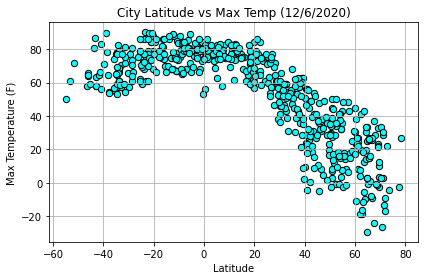

In [56]:
datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

df.plot.scatter('Lat', 'Max Temp', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temp ({title_date})')
plt.tight_layout()


plt.savefig('../output_data/Fig1.png')


## Latitude vs. Humidity Plot

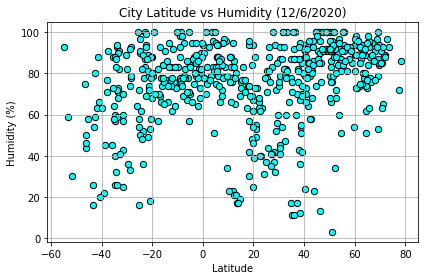

In [57]:
datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

df.plot.scatter('Lat', 'Humidity', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({title_date})')
plt.tight_layout()

plt.savefig('../output_data/Fig2.png')

## Latitude vs. Cloudiness Plot

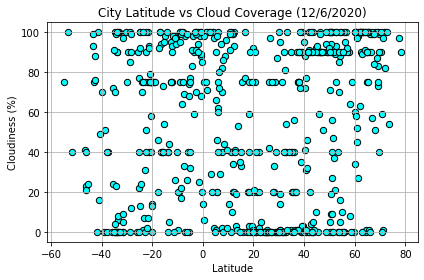

In [58]:
datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

df.plot.scatter('Lat', 'Cloudiness', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloud Coverage ({title_date})')
plt.tight_layout()

plt.savefig('../output_data/Fig3.png')

## Latitude vs. Wind Speed Plot

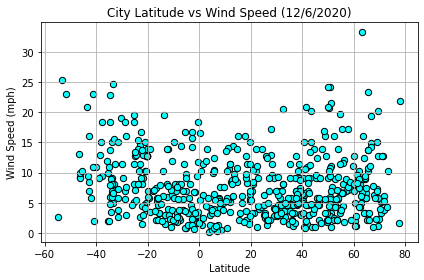

In [59]:
datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

df.plot.scatter('Lat', 'Wind Speed', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({title_date})')
plt.tight_layout()

plt.savefig('../output_data/Fig4.png')

## Linear Regression

In [67]:
northHem_df = df.loc[df['Lat']>=0,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,kapaa,22.08,-159.32,84.20,66,40,10.29,US,1607298267
7,kidal,18.44,1.41,71.02,30,3,8.25,ML,1607298270
8,qaanaaq,77.48,-69.36,-2.25,72,97,1.68,GL,1607298014
9,thompson,55.74,-97.86,17.60,100,90,8.05,CA,1607297990
11,zaraza,9.35,-65.32,74.50,96,96,4.97,VE,1607298271
...,...,...,...,...,...,...,...,...,...
565,sur,22.57,59.53,74.89,62,0,11.10,OM,1607299173
566,tera,14.01,0.75,80.65,17,53,8.90,NE,1607299173
567,tahta,26.77,31.50,57.20,41,0,2.24,EG,1607299173
569,hofn,64.25,-15.21,33.44,92,100,9.44,IS,1607299173


Text(0, -20, 'y = -1.17x + 88.34')

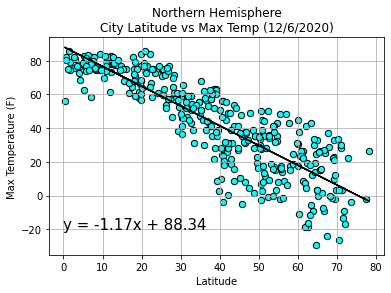

In [79]:
northHem_df = df.loc[df['Lat']>=0,:]
x_value = northHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Max Temp'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

northHem_df.plot.scatter('Lat', 'Max Temp', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Max Temp ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(0,-20), fontsize=15)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-30, 50, 'y = 0.31x + 80.04')

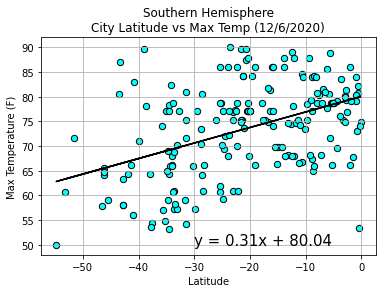

In [81]:
southHem_df = df.loc[df['Lat']<=0,:]
x_value = southHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Max Temp'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

southHem_df.plot.scatter('Lat', 'Max Temp', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Max Temp ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-30,50), fontsize=15)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 5, 'y = 0.25x + 67.21')

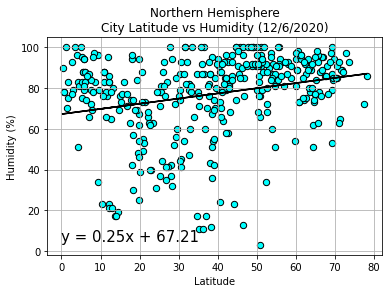

In [84]:
northHem_df = df.loc[df['Lat']>=0,:]
x_value = northHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Humidity'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

northHem_df.plot.scatter('Lat', 'Humidity', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Humidity ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(0,5), fontsize=15)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-25, 30, 'y = 0.61x + 85.73')

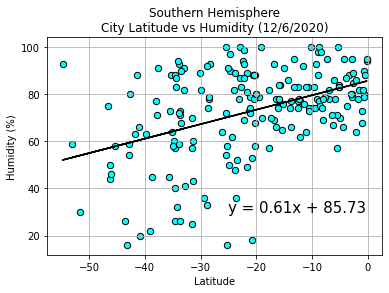

In [87]:
southHem_df = df.loc[df['Lat']<=0,:]
x_value = southHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Humidity'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

southHem_df.plot.scatter('Lat', 'Humidity', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Humidity ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-25,30), fontsize=15)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(45, 20, 'y = 0.51x + 33.57')

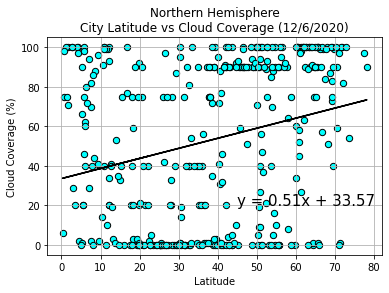

In [92]:
northHem_df = df.loc[df['Lat']>=0,:]
x_value = northHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Cloudiness'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

northHem_df.plot.scatter('Lat', 'Cloudiness', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Cloud Coverage ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(45,20), fontsize=15)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-50, 60, 'y = 0.64x + 70.97')

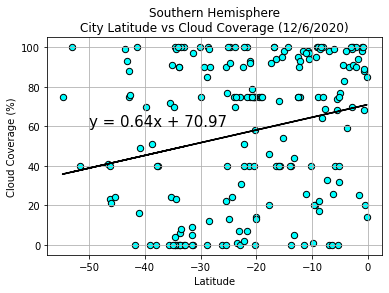

In [94]:
southHem_df = df.loc[df['Lat']<=0,:]
x_value = southHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Cloudiness'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

southHem_df.plot.scatter('Lat', 'Cloudiness', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Cloud Coverage ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-50,60), fontsize=15)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 30, 'y = 0.04x + 5.83')

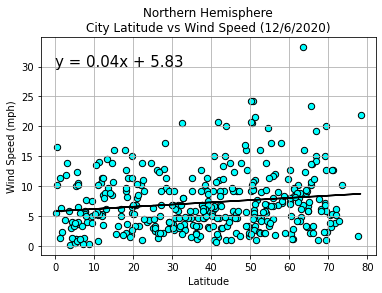

In [96]:
northHem_df = df.loc[df['Lat']>=0,:]
x_value = northHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem_df['Lat'], northHem_df['Wind Speed'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

northHem_df.plot.scatter('Lat', 'Wind Speed', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere\nCity Latitude vs Wind Speed ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(0,30), fontsize=15)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-30, 23, 'y = -0.15x + 5.26')

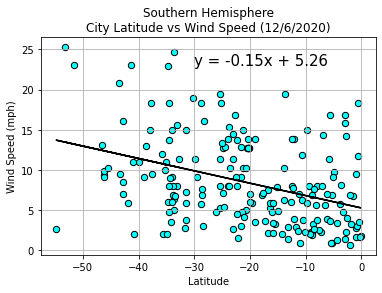

In [98]:
southHem_df = df.loc[df['Lat']<=0,:]
x_value = southHem_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southHem_df['Lat'], southHem_df['Wind Speed'])
regress_value = x_value*slope + intercept

datestamp = time.gmtime(1607298269)
title_date = f'{datestamp.tm_mon}/{datestamp.tm_mday}/{datestamp.tm_year}'

southHem_df.plot.scatter('Lat', 'Wind Speed', grid=True, color='cyan', edgecolor='k', s=40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere\nCity Latitude vs Wind Speed ({title_date})')

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_value, regress_value, c='k')
plt.annotate(line_eq, xy=(-30,23), fontsize=15)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression